<a href="https://colab.research.google.com/github/mugdhajoshi/Neural-Network-and-Deep-Learning/blob/master/final_planar_data_classification_with_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline
np.random.seed(1)


In [0]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta     (linspace(start,stop, number of points to generate))   (random 200 values array multiplied by 0.2)
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]          #c_ is for horizontal concatenation
        Y[ix] = j 
    
    #shape of X is (400,2) and Y is (400,1)    
    X = X.T             
    Y = Y.T

    return X, Y

In [0]:
X, Y = load_planar_dataset()

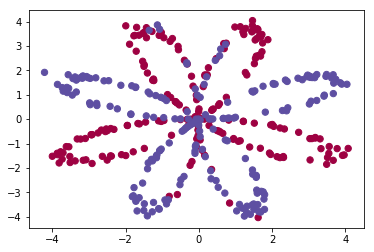

In [0]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [0]:
#Shape of the variables X and Y
shape_X= X.shape
shape_Y= Y.shape
m=shape_Y[1]    #Training set size

print("The Shape of X is: " + str(shape_X))
print("The Shape of Y is: " + str(shape_Y))
print("Number of Training Examples: " +str(m))

The Shape of X is: (2, 400)
The Shape of Y is: (1, 400)
Number of Training Examples: 400


In [0]:
#Logistic Regression
#training the simple logistic regression classifier
lr=sklearn.linear_model.LogisticRegressionCV()
lr.fit(X.T,Y.T)

#Print Accuracy
lr_predict= lr.predict(X.T)
print("Accuracy: " + str(   (( np.dot(Y, lr_predict) + np.dot(1-Y,1-lr_predict) )/ Y.size)*100 ) + "%"    )

Accuracy: [47.]%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
#Neural network model


#Layer sizes
def layer_sizes(X,Y):
  n_x= X.shape[0]                     #size of input layer
  n_h=4                               #size of hidden layer
  n_y=Y.shape[0]                      #size of output layer
  return (n_x, n_h, n_y)
  

In [0]:
#Initialize the model's parameters
def initialize_parameters(n_x, n_h, n_y):
  np.random.seed(2)
  W1= np.random.randn(n_h,n_x)
  b1= np.zeros((n_h,1))
  W2= np.random.randn(n_y,n_h)
  b2= np.zeros((n_y,1))
  
  assert(W1.shape==(n_h,n_x))
  assert(b1.shape==(n_h,1))
  assert(W2.shape==(n_y,n_h))
  assert(b2.shape==(n_y,1))
  
  parameters={"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
  return parameters

In [0]:
def sigmoid(x):
    #x -- A scalar or numpy array of any size.
    # return s -- sigmoid(x)
    s = 1/(1+np.exp(-x))
    return s


In [0]:
#Forward propagation
# X is input data of size = (n_x, m)

def forward_propagation(X, parameters):
  W1= parameters["W1"]
  b1= parameters["b1"]
  W2= parameters["W2"]
  b2= parameters["b2"]
  
  #implement forward propagation to compute A2
  Z1 = np.dot(W1,X)+b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1)+b2
  A2 = sigmoid(Z2)
  
  assert(A2.shape==(1,X.shape[1]))
  
  cache={"Z1":Z1,
         "A1":A1,
         "Z2":Z2,
         "A2":A2}
  return A2,cache

In [0]:
#compute cost
def compute_cost(A2,Y,parameters):
  m=Y.shape[1]   #number of examples
  logprobs= np.multiply(np.log(A2),Y)+ np.multiply(np.log(1-A2),(1-Y))
  cost = -np.sum(logprobs)/m
  cost=np.squeeze(cost)       #turns [[5]] into 5
  assert(isinstance(cost,float))
  return cost

  
  
  

In [0]:
#backward Propagation
def backward_propagation(parameters, cache, X, Y):
  m=X.shape[1]
  W1=parameters["W1"]
  W2=parameters["W2"]
  
  A1=cache["A1"]
  A2=cache["A2"]
  
  dZ2= A2-Y
  dW2= np.dot(dZ2,A1.T)/m
  db2= np.sum(dZ2,axis=1,keepdims=True)/m
  dZ1= np.multiply(np.dot(W2.T,dZ2), (1-np.power(A1,2)))
  dW1= np.dot(dZ1,X.T)/m
  db1= np.sum(dZ1,axis=1,keepdims=True)/m
  
  grads={"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}
  return grads

In [0]:
#update parameters
def update_parameters(parameters, grads, learning_rate=1.2):
  
  #Retrieve each parameter from the dictionary "parameters"
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]
  
  # Retrieve each gradient from the dictionary "grads"
  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]
  
  
  #Update each parameters
  
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
   
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
  return parameters
  

In [0]:
#integrate in one function
def nn_model(X, Y , n_h, num_iterations=10000, print_cost= False):
  np.random.seed(3)
  
  n_x= layer_sizes(X, Y)[0]
  n_y= layer_sizes(X, Y)[2]
  
  #initialize parameters
  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  
  #loop gradient descent
  for i in range(0, num_iterations):
    A2, cache = forward_propagation(X, parameters)
    cost= compute_cost(A2, Y, parameters)
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, grads)
    
    #print cost every 1000 iterations
    if print_cost and i%1000==0:
      print("Cost after iteration %i: %f" %(i, cost))
  return parameters    
    
  
  
  

In [0]:
#Predict
def predict(parameters, X):
  A2,cache=forward_propagation(X, parameters)
  predictions = np.round(A2)
  return predictions


In [0]:
parameters = nn_model(X, Y, n_h=4, num_iterations = 10000, print_cost = True)


Cost after iteration 0: 1.127380
Cost after iteration 1000: 0.288553
Cost after iteration 2000: 0.276386
Cost after iteration 3000: 0.268077
Cost after iteration 4000: 0.263069
Cost after iteration 5000: 0.259617
Cost after iteration 6000: 0.257070
Cost after iteration 7000: 0.255105
Cost after iteration 8000: 0.253534
Cost after iteration 9000: 0.252245


In [0]:
#print accuracy
predictions = predict(parameters, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/ float(Y.size)*100)+ '%' )

Accuracy: 91%
